In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]>

In [ ]:
#check for missing values
missing_values=df.isnull().sum()
#calculate the percentage of missing data in each column
missing_percentage=(missing_values/len(df))*100
#display the missing values in column
print("missing_values\n",missing_values)
print("missing_percentage\n",missing_percentage)

missing_values
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
missing_percentage
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [ ]:
#remove rows with missing values
data_cleaned = df.dropna()
#verify that missing values have been removed
print("\n missing value in each rows and column:")
print(data_cleaned.isnull().sum())


 missing value in each rows and column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


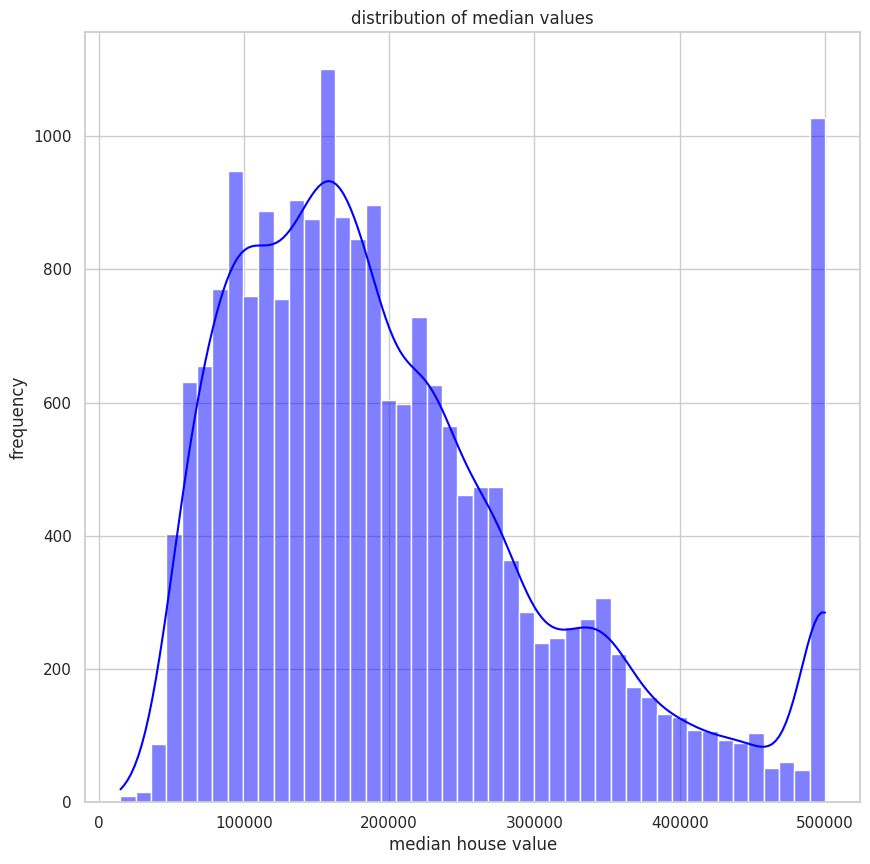

In [ ]:
sns.set(style="whitegrid")#discrite figures
plt.figure(figsize=(10,10))#figure size
sns.histplot(data_cleaned['median_house_value'],color='blue',kde=True)
plt.title('distribution of median values')
plt.xlabel('median house value')
plt.ylabel('frequency')
plt.show()

In [ ]:
#assuming 'data' is your Datframe and 'mediumhouse of teh column of the interset
Q1=data_cleaned['median_house_value'].quantile(0.25)
print(Q1)
Q3=data_cleaned['median_house_value'].quantile(0.75)
print(Q3)
IQR=Q3-Q1

#definethe bounds for the outliers
lower_bound =Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#remove outliers
data_no_outliers=data_cleaned[(data_cleaned['median_house_value']>=lower_bound)&(data_cleaned['median_house_value']<=upper_bound)]
#check the shape of the data before and after removal of outliers
print("original data shape:",data_cleaned.shape)
print("new data shape without outliers",data_no_outliers.shape)

119500.0
264700.0
original data shape: (20433, 10)
new data shape without outliers (19369, 10)


<ipython-input-20-31db3bd94d48>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Greens')


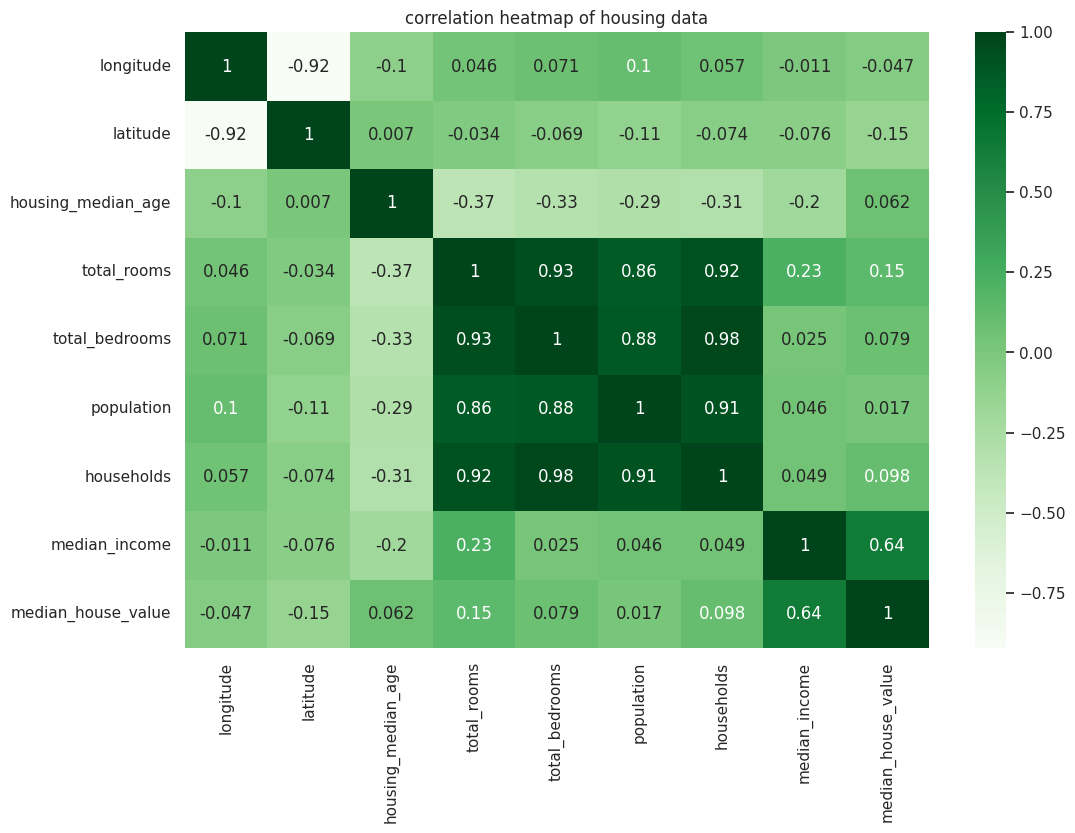

In [ ]:
data=data_no_outliers
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.title('correlation heatmap of housing data')
plt.show()

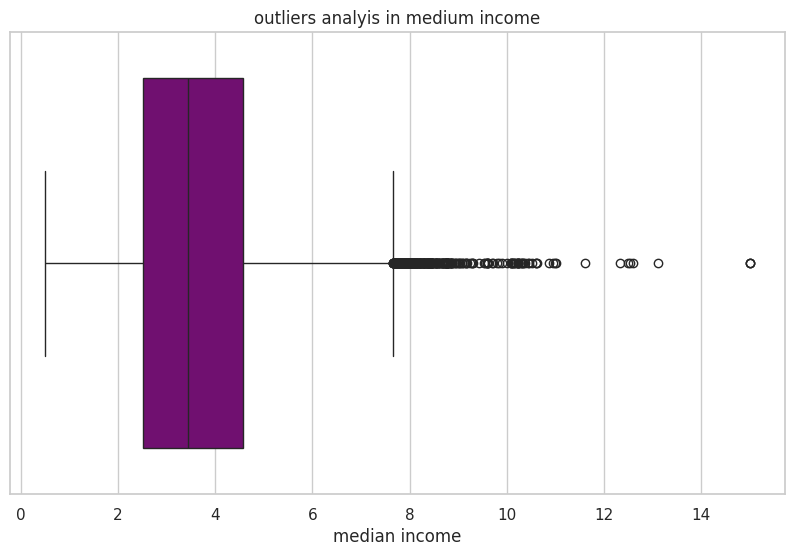

In [ ]:
#outliers of the mediam income
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers['median_income'],color='purple')
plt.title("outliers analyis in medium income")
plt.xlabel("median income")
plt.show()

In [ ]:
#unique value count for categorical data
for column in ['ocean_proximity']:
  print("Unique values in {column}:",data[column].unique())

Unique values in {column}: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'],prefix='ocean_proximity')
data=pd.concat([data.drop("ocean_proximity",axis=1),ocean_proximity_dummies],axis=1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
data = data.drop("ocean_proximity_ISLAND",axis = 1)
data.columns

KeyError: "['ocean_proximity_ISLAND'] not found in axis"

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [ ]:
#define your features(independent variables)and target(dependent variable)
features = {'longitude','latitude','housing_median_age','total_rooms',
            'total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN',
            'ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'}
target={'median_house_value'}
X = data[features]
y = data[target]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=111)
#check the size of the splits
print('training set size:{x_train.shape[0]} samples')
print('test set size:{x_test.shape[0]} samples')

training set size:{x_train.shape[0]} samples
test set size:{x_test.shape[0]} samples


<ipython-input-30-9b0376d84917>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = data[features]
<ipython-input-30-9b0376d84917>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  y = data[target]


In [ ]:
X_test_const=sm.add_constant(X_train)
#fit OLS modal ordinary least square
modal_fitted=sm.OLS(y_train,X_test_const).fit()
#printing summary
print(modal_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2284.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        04:31:13   Log-Likelihood:            -1.9219e+05
No. Observations:               15495   AIC:                         3.844e+05
Df Residuals:                   15483   BIC:                         3.845e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [ ]:
#adding a constant to the test predictors
X_test_const=sm.add_constant(X_test)
#making predictions on the test set
test_predictions=modal_fitted.predict(X_test_const)

ValueError: x and y must be the same size

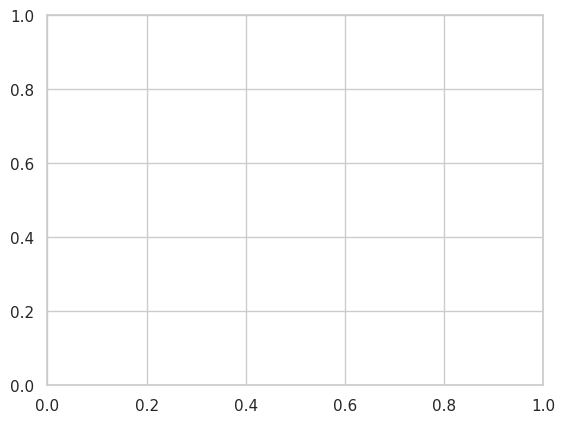

In [ ]:
#checking ols assumptions
#scatter plot for observed vs predicated values on test data
plt.scatter(X_test_const,test_predictions,color="forestgreen")
plt.xlabel("Observed Values")
plt.ylabel("Predicated Values")
plt.title("Observed vs Predicted Values on Test Data")
plt.plot(y_test,y_test,color="darkred")
plt.show

Random samples

In [ ]:
#calculate the mean of the residuals
mean_residuals = np.mean(modal_fitted.resid)
print(f"The mean of the  residuals is {np.round(mean_residuals,2)}")

NameError: name 'modal_fitted' is not defined

In [ ]:
#plotting residuals
plt.scatter(modal_fitted.fittedvalues,modal_fitted.resid,color="navyblue")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
#exogeneity
#calculate the residuals
residuals = modal_fitted.resid
#check the correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column],residuals)[0,1]
  print(f'Correlation between residuals and {column}:{np.round(corr_coefficient,2)}')

Correlation between residuals and latitude:-0.0
Correlation between residuals and ocean_proximity_NEAR BAY:0.0
Correlation between residuals and median_income:-0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN:-0.0
Correlation between residuals and longitude:0.0
Correlation between residuals and total_bedrooms:0.0
Correlation between residuals and households:0.0
Correlation between residuals and ocean_proximity_<1H OCEAN:0.0
Correlation between residuals and population:0.0
Correlation between residuals and housing_median_age:-0.0
Correlation between residuals and total_rooms:0.0


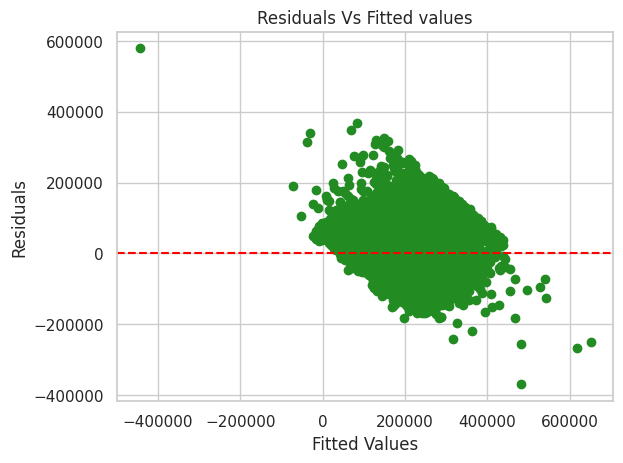

In [ ]:
#homoskedasticity
#plotting the residuals
plt.scatter(modal_fitted.fittedvalues,modal_fitted.resid,color="forestgreen")
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Vs Fitted values')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
#initialize the standardScaler
scaler=StandardScaler()
#fit the scalar on the traing data and transform it
X_train_scaled=scaler.fit_transform(X_train)
#apply the same transformations to the test data
X_test_scaled=scaler.transform(X_test)

In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'MSE on Test Set: {mse}')
print(f'RMSE on Test Set: {rmse}')

MSE on Test Set: 3598700836.5904164
RMSE on Test Set: 59989.17266132628
